In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/")

In [3]:
%cd MyDrive/Colab Notebooks/Room Classification

/content/drive/MyDrive/Colab Notebooks/Room Classification


In [4]:
import numpy as np
from tensorflow.keras.models import load_model

In [14]:
model = load_model('model1.h5')

In [8]:
import pickle
with open('X_test.pickle','rb') as f:
  X_test = pickle.load(f)
X_test.shape

(1648, 150, 150, 3)

In [18]:
with open('y_test.pickle','rb') as f:
  y_test = pickle.load(f)
print(y_test[:5])
y_test.shape

[1. 1. 0. 0. 1.]


(1648,)

In [15]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 69, 69, 64)        51264     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
flatten_13 (Flatten)         (None, 65536)             0         
_________________________________________________________________
dense_33 (Dense)             (None, 64)              

In [20]:
y_predicted = model.predict(X_test)

In [22]:
y_predicted_labels = [np.argmax(y) for y in y_predicted]

In [24]:
y_predicted_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

#Confusion Matrix

In [26]:
from tensorflow.math import confusion_matrix
cm = confusion_matrix(y_test, y_predicted_labels, num_classes=2)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[705, 102],
       [220, 621]], dtype=int32)>

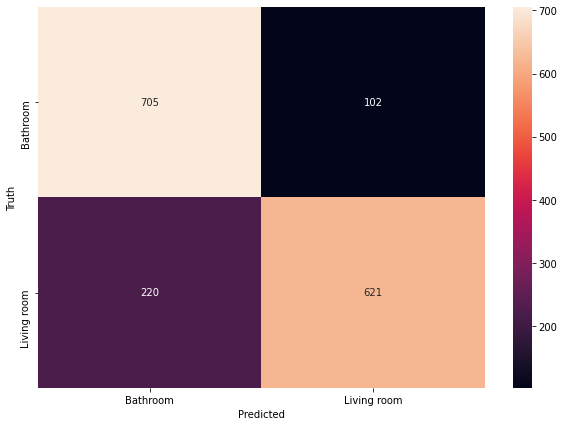

In [39]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.xticks(ticks=[0.5,1.5], labels=['Bathroom','Living room'])
plt.yticks(ticks=[0.5,1.5], labels=['Bathroom','Living room'])
plt.show()

#Test with .JPG picture imported through URL

In [40]:
from urllib.request import urlretrieve
import PIL
import cv2
def classify_from_URL(url):
  urlretrieve(url, "sample.jpg")
  x = cv2.imread("sample.jpg")
  x_test = cv2.resize(x,(150,150,))
  label_lst = ["Bathroom", "Living room"]
  y_predict_label = label_lst[np.argmax(model.predict(np.array([x_test.tolist()])))]
  plt.matshow(x_test)
  plt.xlabel(y_predict_label)

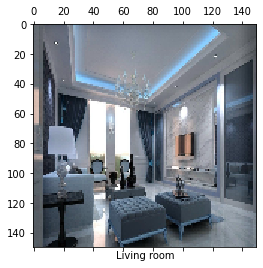

In [41]:
classify_from_URL('https://i.pinimg.com/originals/22/63/3c/22633cd4dc4b98fe248d224475d54b88.jpg')

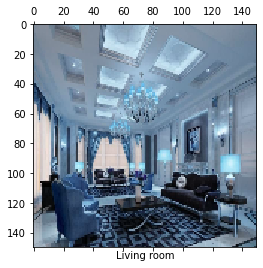

In [44]:
classify_from_URL('https://i.pinimg.com/originals/25/e1/44/25e14431a38ddf44c095934a15ce9397.jpg')

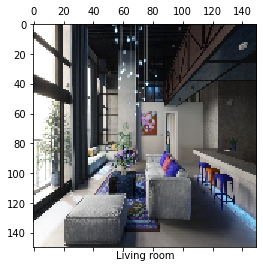

In [45]:
classify_from_URL('https://cdn.home-designing.com/wp-content/uploads/2018/01/flying-pendant-lights-colourful-stools-kitsch-living-room.jpg')

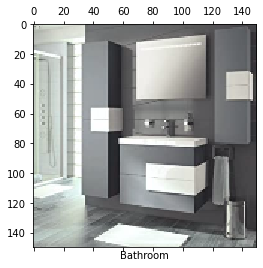

In [47]:
classify_from_URL('https://images-na.ssl-images-amazon.com/images/I/41WoO28JijL._AC_SX355_.jpg')

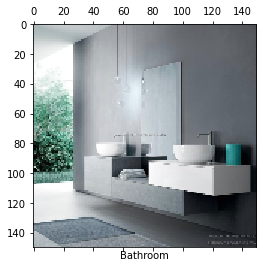

In [48]:
classify_from_URL('https://www.bathroom-china.com/wp-content/uploads/2015/12/AL05-220-650x650.jpg')

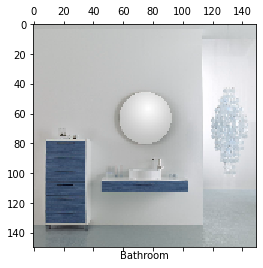

In [49]:
classify_from_URL('https://www.lussostone.com/images/lusso-stone-vogue-large-wall-mounted-designer-bathroom-vanity-unit-1200-p55-343_zoom.jpg')

#Test with picture import from local machine

In [52]:
def classify(picture):
  img = cv2.imread(picture)
  img_resized = cv2.resize(img, (150,150,))
  label_lst = ["Bathroom", "Living room"]
  y_predict_label = label_lst[np.argmax(model.predict(np.array([img_resized.tolist()])))]
  plt.figure(figsize=(10,7))
  plt.matshow(img_resized)
  plt.xlabel(y_predict_label)

In [50]:
from google.colab import files

In [58]:
def upload_picture():
  uploaded = files.upload()
  for fn in uploaded.keys():
    classify(fn)

Saving nhatam_1.jpg to nhatam_1.jpg
Saving nhatam_2.jpg to nhatam_2.jpg
Saving nhatam_3.jpg to nhatam_3.jpg
Saving nhatam_4.jpg to nhatam_4.jpg
Saving phongkhach_1.jpg to phongkhach_1.jpg
Saving phongkhach_2.jpg to phongkhach_2.jpg
Saving phongkhach_3.jpg to phongkhach_3.jpg


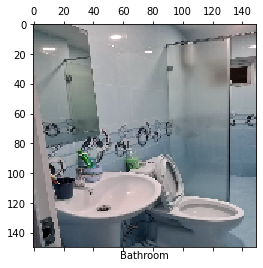

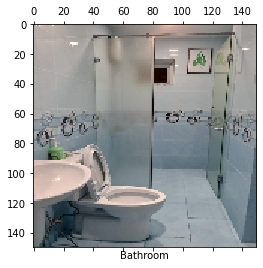

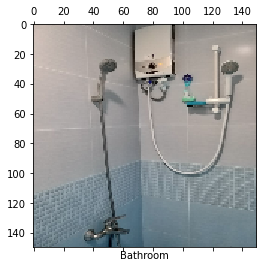

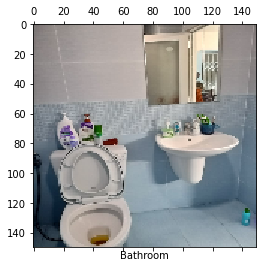

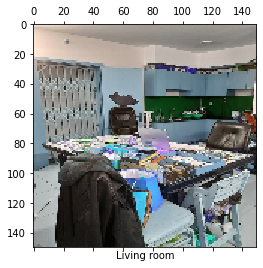

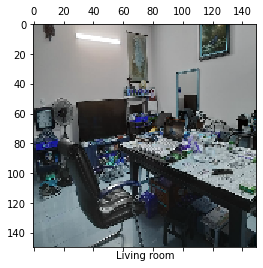

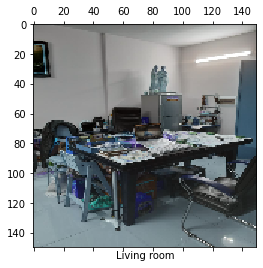

In [61]:
upload_picture()